# Graficación con R

## Objetivo

El objetivo de esta actividad es desarrollar habilidades prácticas en el análisis y visualización de datos utilizando el lenguaje de programación R. Los alumnos aprenderán a manipular y transformar conjuntos de datos, crear gráficos descriptivos, y realizar análisis exploratorios para extraer información valiosa sobre eventos de desastres naturales.

## Ejercicio 1: Análisis exploratorio de datos

Realice un análisis exploratorio básico del conjunto de datos de desastres.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Resuma el número total de desastres por año.
3. Cree un gráfico de línea que muestre el número total de desastres por año.
4. Añada etiquetas a los ejes y un título al gráfico.
5. Si el caso aplica, realice anotaciones en el gráfico.


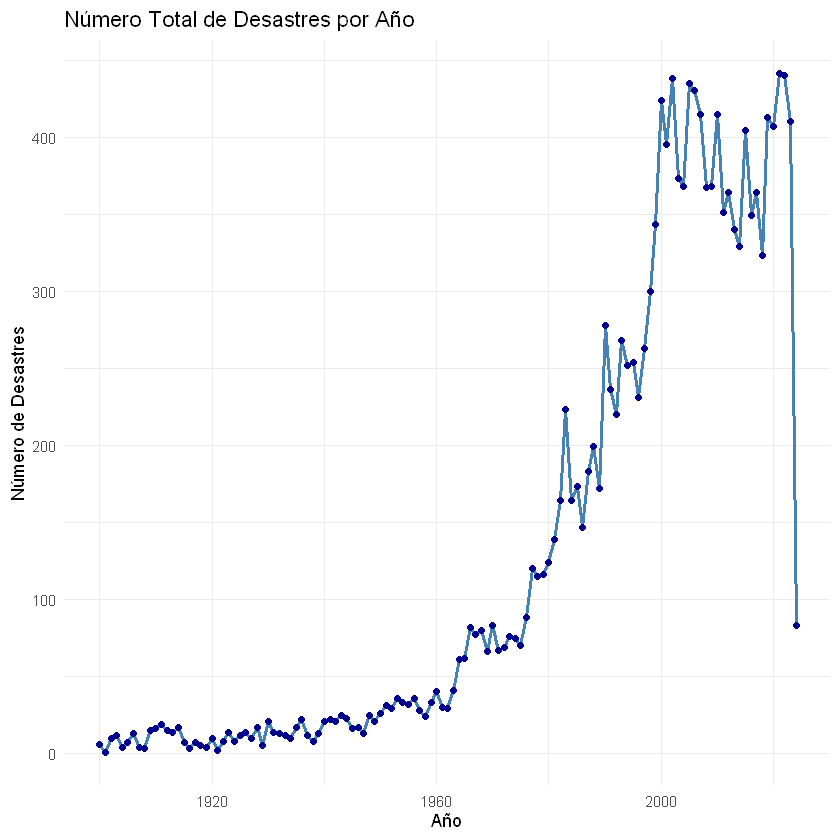

In [2]:
# Cargar librerías
library(dplyr)
library(ggplot2)

# 1. Cargar datos
data <- read.csv("Datos/disaster-events_new.csv")

# 2. Filtrar solo el total general
total_year <- data %>%
  filter(Entity == "All disasters") %>%
  group_by(Year) %>%
  summarise(Total = sum(Disasters))

# 3. Gráfico de línea
ggplot(total_year, aes(x = Year, y = Total)) +
  geom_line(color = "steelblue", size = 1) +
  geom_point(color = "darkblue") +
  labs(title = "Número Total de Desastres por Año",
       x = "Año",
       y = "Número de Desastres") +
  theme_minimal()

## Ejercicio 2: Histograma de tipos de desastres

Cree un histograma que muestre la distribución de diferentes tipos de desastres en el conjunto de datos.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Cree un histograma de los diferentes tipos de desastres.
3. Añada un título y etiquetas a los ejes.
4. Cambie el color de las barras del histograma.
5. Si el caso aplica, realice anotaciones en el gráfico.


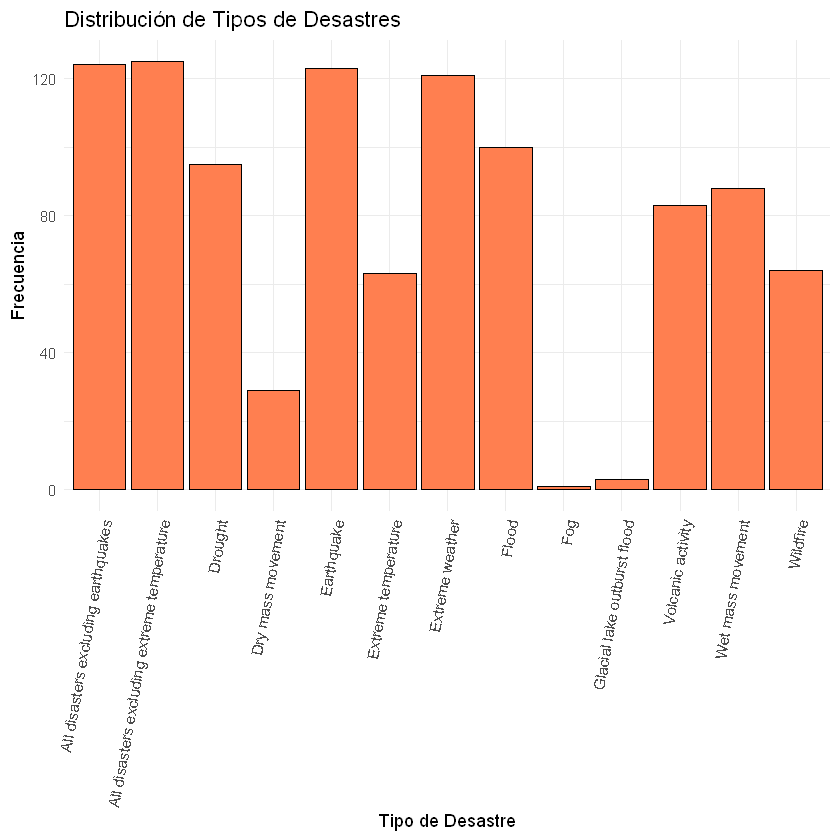

In [9]:
library(ggplot2)

data <- read.csv("Datos/disaster-events_new.csv")

# Excluir el total general
types <- data[data$Entity != "All disasters", ]

ggplot(types, aes(x = Entity)) +
  geom_bar(fill = "coral", color = "black") +
  labs(title = "Distribución de Tipos de Desastres",
       x = "Tipo de Desastre",
       y = "Frecuencia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 80, hjust = 1))

## Ejercicio 3: Análisis de tendencias de desastres específicos

Analice las tendencias de desastres específicos a lo largo del tiempo.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Seleccione un tipo (o más de uno) específico de desastre, por ejemplo, Earthquake.
3. Cree un gráfico de línea que muestre la tendencia de este tipo de desastre a lo largo del tiempo.
4. Si selecciona más de uno, agréguelo en el mismo gráfico.
5. Añada etiquetas a los ejes y un título al gráfico.
6. Si el caso aplica, realice anotaciones en el gráfico.


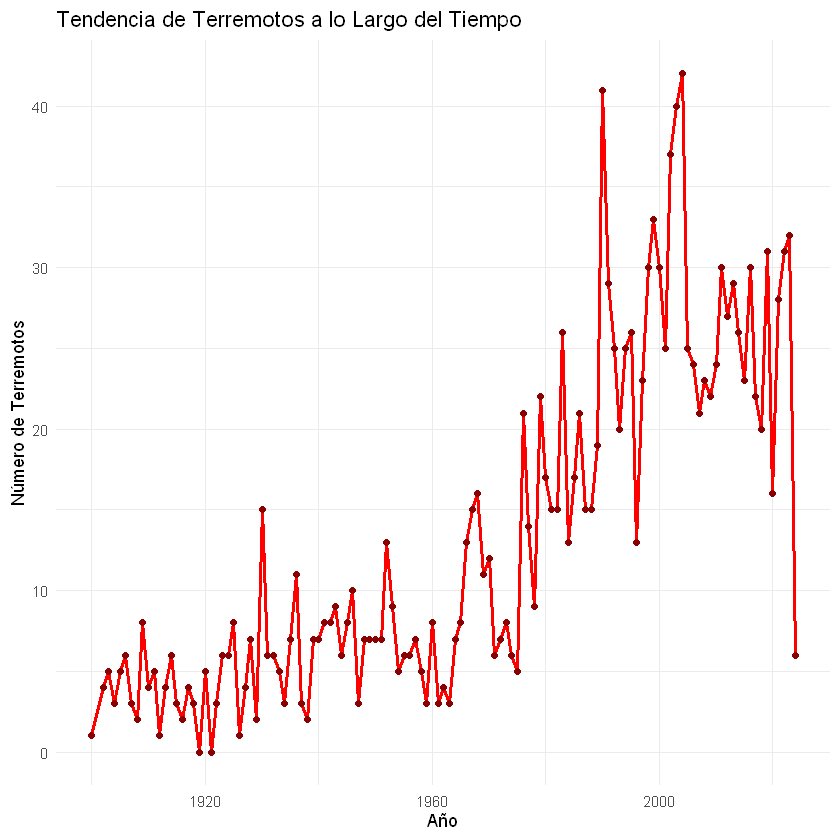

In [11]:
library(dplyr)
library(ggplot2)

data <- read.csv("Datos/disaster-events_new.csv")

total <- data %>%
  filter(Entity == "All disasters") %>%
  select(Year, Disasters)

no_eq <- data %>%
  filter(Entity == "All disasters excluding earthquakes") %>%
  select(Year, Disasters)

# Unir por Year
earthquakes <- total %>%
  inner_join(no_eq, by = "Year", suffix = c("_total", "_noeq")) %>%
  mutate(
    Disasters = Disasters_total - Disasters_noeq,
    Entity = "Earthquakes"
  ) %>%
  select(Year, Disasters, Entity)

# Gráfico
ggplot(earthquakes, aes(x = Year, y = Disasters)) +
  geom_line(color = "red", linewidth = 1) +
  geom_point(color = "darkred") +
  labs(title = "Tendencia de Terremotos a lo Largo del Tiempo",
       x = "Año",
       y = "Número de Terremotos") +
  theme_minimal()


## Ejercicio 4: Gráfico de barras de desastres por década

Cree un gráfico de barras que muestre el número de desastres por década.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Calcule el número de desastres por década.
3. Cree un gráfico de barras que muestre esta información.
4. Añada un título y etiquetas a los ejes.
5. Si el caso aplica, realice anotaciones en el gráfico.


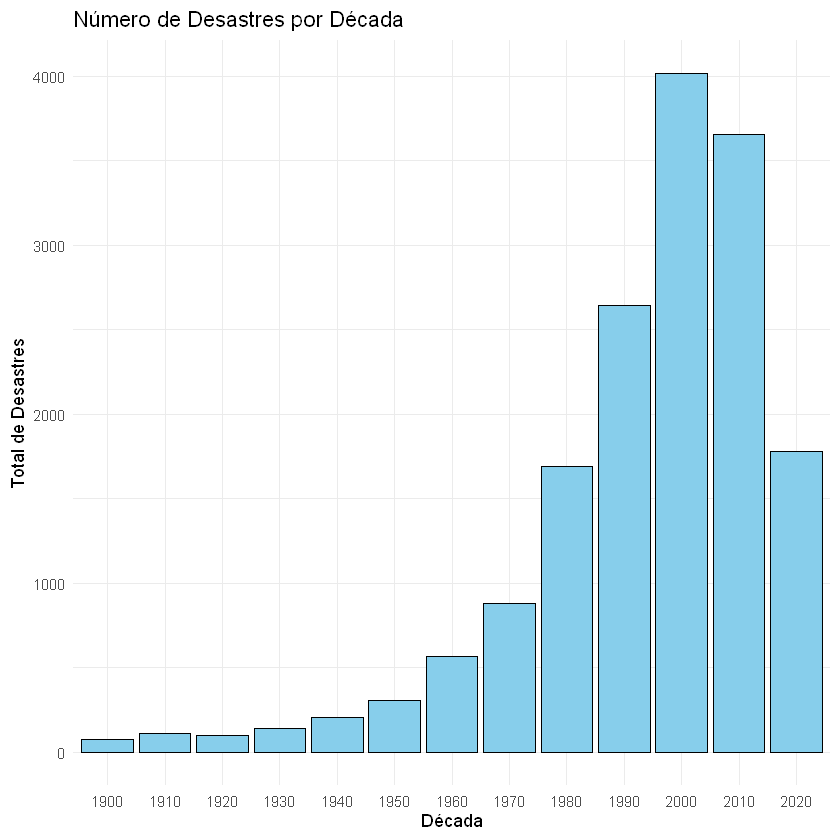

In [12]:
library(dplyr)
library(ggplot2)

data <- read.csv("Datos/disaster-events_new.csv")

# Usamos solo total general
total <- data %>% filter(Entity == "All disasters")

# Crear década
total$Decade <- floor(total$Year / 10) * 10

decade_sum <- total %>%
  group_by(Decade) %>%
  summarise(Total = sum(Disasters))

# Gráfico de barras
ggplot(decade_sum, aes(x = factor(Decade), y = Total)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Número de Desastres por Década",
       x = "Década",
       y = "Total de Desastres") +
  theme_minimal()

## Ejercicio 5: Boxplot de desastres por década

Cree un boxplot que muestre la distribución del número de desastres por década.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Calcule la mediana, los cuartiles y los valores atípicos del número de desastres por década.
3. Cree un boxplot para visualizar esta información.
4. Añada un título y etiquetas a los ejes.
5. Si el caso aplica, realice anotaciones en el gráfico.


# A tibble: 13 × 4
   Decade Mediana    Q1    Q3
    <dbl>   <dbl> <dbl> <dbl>
 1   1900     6.5   4    11.5
 2   1910    10.5   5.5  15.8
 3   1920    10     8    13.5
 4   1930    13    12    16.2
 5   1940    21    18    22.8
 6   1950    31.5  28.2  33  
 7   1960    61.5  40.2  74.2
 8   1970    79.5  71.2 108. 
 9   1980   168   151.  180. 
10   1990   258.  240   276. 
11   2000   405   369.  428. 
12   2010   358.  342.  394  
13   2020   410   407   440  


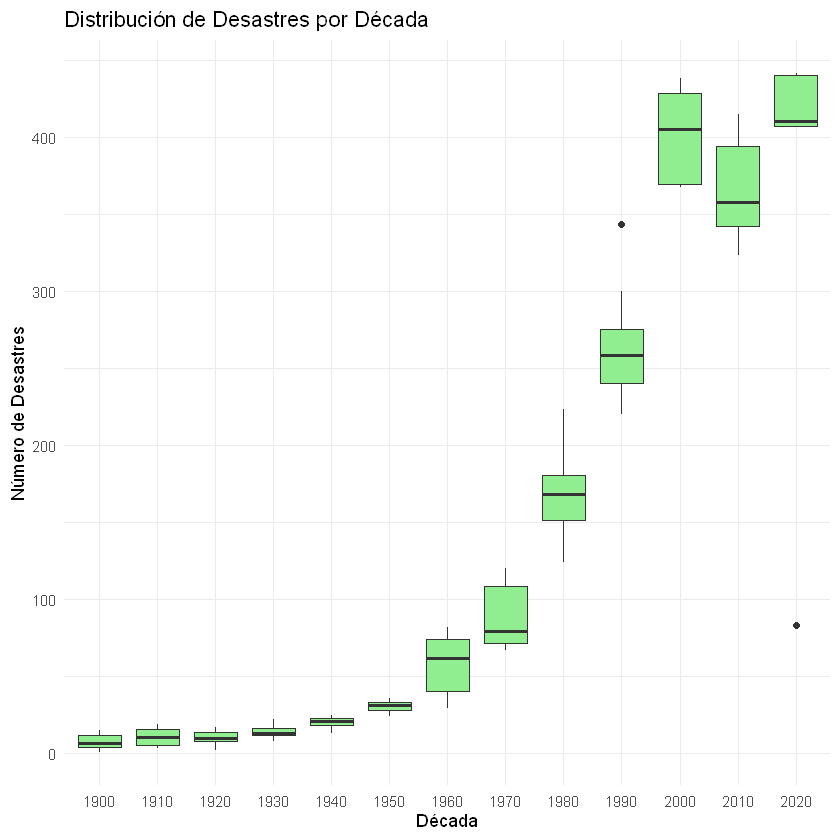

In [13]:
library(dplyr)
library(ggplot2)

data <- read.csv("Datos/disaster-events_new.csv")

total <- data %>% filter(Entity == "All disasters")
total$Decade <- floor(total$Year / 10) * 10

# Resumen estadístico
summary_stats <- total %>%
  group_by(Decade) %>%
  summarise(
    Mediana = median(Disasters),
    Q1 = quantile(Disasters, 0.25),
    Q3 = quantile(Disasters, 0.75)
  )

print(summary_stats)

# Boxplot
ggplot(total, aes(x = factor(Decade), y = Disasters)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Distribución de Desastres por Década",
       x = "Década",
       y = "Número de Desastres") +
  theme_minimal()

## Ejercicio 6: Comparación de desastres con y sin terremotos

Compare el número de desastres totales con y sin la inclusión de terremotos.

### Instrucciones

1. Cargue el conjunto de datos `disaster-events_new.csv`.
2. Cree un gráfico de barras que compare el número total de desastres con y sin terremotos para cada año.
3. Añada un título y etiquetas a los ejes.
4. Si el caso aplica, realice anotaciones en el gráfico.


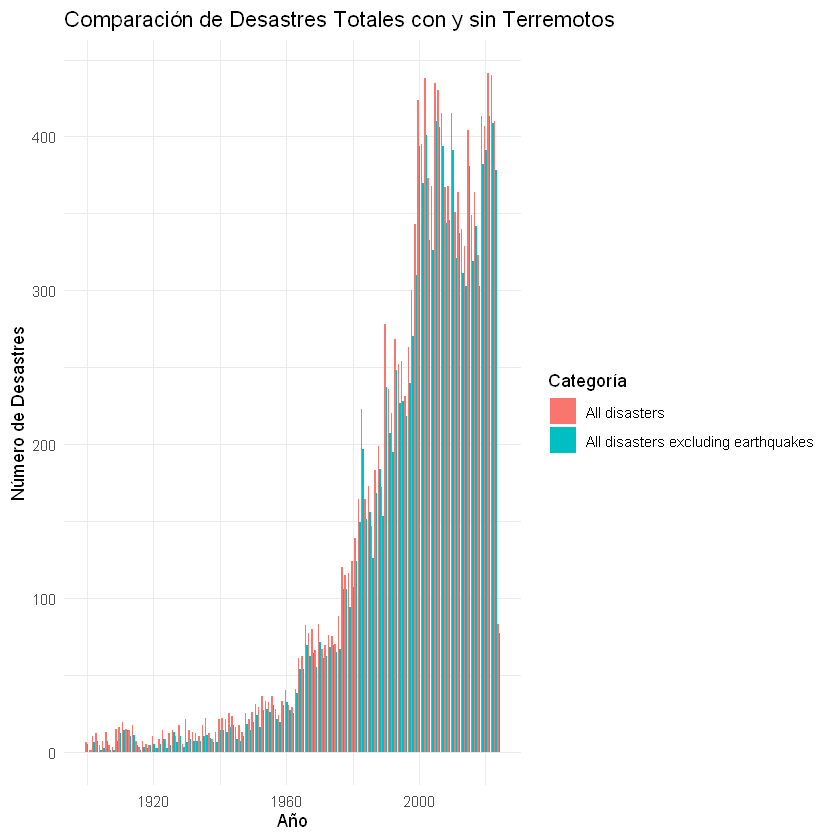

In [14]:
library(dplyr)
library(ggplot2)

data <- read.csv("Datos/disaster-events_new.csv")

compare <- data %>%
  filter(Entity %in% c("All disasters",
                       "All disasters excluding earthquakes"))

ggplot(compare, aes(x = Year, y = Disasters, fill = Entity)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Comparación de Desastres Totales con y sin Terremotos",
       x = "Año",
       y = "Número de Desastres",
       fill = "Categoría") +
  theme_minimal()

## Referencias

1. Hannah Ritchie and Pablo Rosado (2024)- “Is the number of natural disasters increasing?”
Published online at OurWorldInData.org. Retrieved from: https://ourworldindata.org/
disaster-database-limitations [Online Resource]
2. https://www.emdat.be/
3. https://doc.emdat.be/docs/
4. https://www.kaggle.com/dsv/8598144

5. [Repositorio de GitHub con Jupiter Notebook de la Practica.](https://github.com/RKCbas/Maestria-en-Inteligencia-Artificial---Practicas/blob/main/Cuatrimestre%202/3%20-%20Lenguajes%20de%20ciencia%20de%20datos%20intermedio/Practica%205.1/Graficación%20con%20R.ipynb)